In [1]:
from glio2.imports import *
from glio2 import nn as g2nn

import joblib
import torch
from torchvision.datasets import MNIST
from torchvision.transforms import v2
from glio2.data import DS

import mrid
from mrid.training.mri_slicer import MRISlicer


In [2]:
dataset = joblib.load(r"E:\dataset\glio\BraTS-GLI v2\brats-gli 75-100.joblib")

In [17]:
dir(dataset[0])

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'around',
 'get_all_dim_slice_callables',
 'get_all_dim_slices',
 'get_all_empry_slices',
 'get_all_empty_slice_callables',
 'get_all_seg_slice_callables',
 'get_all_seg_slices',
 'get_all_slice_callables',
 'get_all_slices',
 'get_anyp_random_slice_callables',
 'get_non_empty_count',
 'get_random_slice',
 'get_slice',
 'num_classes',
 'prob',
 'seg',
 'set_settings',
 'shape',
 'tensor',
 'x',
 'y',
 'yield_all_dim_slice_callables',
 'yield_all_empty_slice_callables',
 'yield_all_seg_slice_callables',
 'yield_all_slice_callables',
 'z']

In [15]:
dataset2 = []
for sample in dataset:
    dataset2.append(MRISlicer(sample.tensor, sample.seg, num_classes=5))

F:\Stuff\Programming\AI\glio2\glio2\src\glio2\plt_tools\_utils.py:26: UserWarning: Image has more than 3 channels, only first 3 will be shown. Shape is (179, 137, 12)
  if warn: warnings.warn(f'Image has more than {maxv} channels, only first {maxv} will be shown. Shape is {x.shape}')


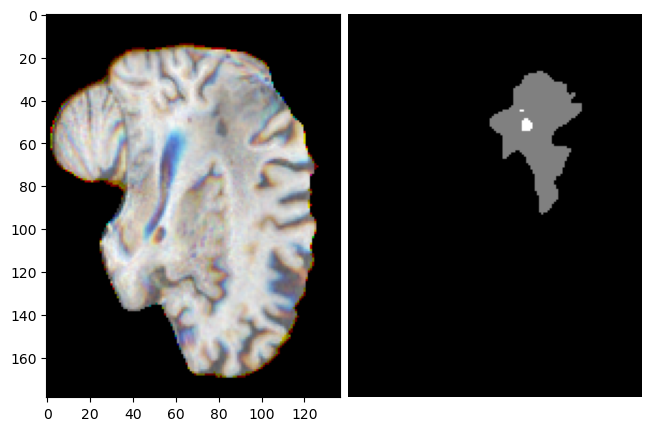

In [16]:
imshow_grid(dataset2[0].get_random_slice()).show()

In [ ]:
def load_old_mrislicer_dataset(path, num_classes: int, around: int, any_prob: float = 0.1, warn_empty: bool = True) -> list[MRISlicer]:
    old_format = joblib.load(path)
    dataset = []
    for sample in old_format:
        dataset.append(MRISlicer(sample.tensor, sample.seg, num_classes=num_classes, around = around, any_prob = any_prob, warn_empty=warn_empty))
    
    return dataset